In [1]:
import csv as csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('shot_logs.csv')


In [3]:
new_pd = data[['GAME_ID','LOCATION','SHOT_RESULT','PTS', 'player_name', 'player_id', 'DRIBBLES', 'SHOT_CLOCK', 'PERIOD', 'SHOT_DIST']]

In [4]:
new_pd.head()

,GAME_ID,LOCATION,SHOT_RESULT,PTS,player_name,player_id,DRIBBLES,SHOT_CLOCK,PERIOD,SHOT_DIST
0,21400899,A,made,2,brian roberts,203148,2,10.8,1,7.7
1,21400899,A,missed,0,brian roberts,203148,0,3.4,1,28.2
2,21400899,A,missed,0,brian roberts,203148,3,NaN,1,10.1
3,21400899,A,missed,0,brian roberts,203148,2,10.3,2,17.2
4,21400899,A,missed,0,brian roberts,203148,2,10.9,2,3.7


In [5]:
mades = new_pd.loc[(new_pd['PERIOD'] < 5) & (new_pd['SHOT_RESULT'] == 'made') ]
mades.head()


,GAME_ID,LOCATION,SHOT_RESULT,PTS,player_name,player_id,DRIBBLES,SHOT_CLOCK,PERIOD,SHOT_DIST
0,21400899,A,made,2,brian roberts,203148,2,10.8,1,7.7
7,21400899,A,made,2,brian roberts,203148,3,3.4,4,3.5
11,21400890,H,made,2,brian roberts,203148,14,12.1,4,14.6
12,21400890,H,made,2,brian roberts,203148,2,4.3,4,5.9
15,21400859,A,made,3,brian roberts,203148,3,6.4,2,24.7


In [6]:
MADES =mades.groupby('PERIOD')['SHOT_RESULT'].count()
PTS =mades.groupby('PERIOD')['PTS'].mean()
distance = mades.groupby('PERIOD')['SHOT_DIST'].mean()

player_df = pd.DataFrame({'SHOTS MADE IN PD':MADES, 'AVG PTS per SHOT in PD':PTS, 'SHOT_DIST': distance})
player_df

,AVG PTS per SHOT in PD,SHOTS MADE IN PD,SHOT_DIST
PERIOD,,,
1,2.192072,15640,11.713785
2,2.197997,14278,11.380389
3,2.206995,14725,11.835321
4,2.229071,12817,11.844488


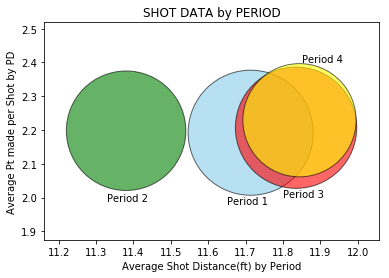

In [23]:
plt.scatter( x = player_df['SHOT_DIST'] , y = player_df['AVG PTS per SHOT in PD'], s=player_df['SHOTS MADE IN PD'],color = ['skyblue', 'green', 'red', 'yellow'],alpha=.6,linewidth = 1,edgecolor = 'black')
plt.title("SHOT DATA by PERIOD")
plt.annotate('Period 1', xy = (11.7,2.2), xytext=(11.65,1.98) )
plt.annotate('Period 2', xy = (11.35,2.2), xytext=(11.33,1.99) )
plt.annotate('Period 3', xy = (11.85,2.2), xytext=(11.80,2) )
plt.annotate('Period 4', xy = (11.85,2.2), xytext=(11.85,2.4) )
plt.ylabel("Average Pt made per Shot by PD")
plt.xlabel("Average Shot Distance(ft) by Period")
plt.show()